## Problem Statement:
The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings. Our goal is to develop and optimize Machine Learning models that effectively predict the bike rental count for the day



In [44]:
# Load all the packages required for the analysis
library(tidyverse)
library(ggplot2) # Visualisation
install.packages("corrgram")
install.packages("caret")
library(caret)
library(corrgram)
install.packages("Metrics")
library(Metrics)

library(rpart)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Dataset
This dataset contains 731 rows and 16 columns
columns are as follows :
- instant: record index
- dteday: date
- season: season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: year (0: 2011, 1:2012)
- mnth: month ( 1 to 12)
- holiday: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday: day of the week
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit:
* 1: Clear, Few clouds, Partly cloudy,
* 2: Mist and Cloudy, Mist and Broken clouds, Mist and Few clouds, Mist
* 3: Light Snow, Light Rain and Thunderstorm and Scattered clouds, Light Rain an dScattered clouds
* 4: Heavy Rain and Ice Pallets and Thunderstorm and Mist, Snow and Fog
- temp: Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [45]:
############################################Explore the data##########################################
## Read the data
bike_pr_day <- read.csv("./day.csv", stringsAsFactors=FALSE)
dim(bike_pr_day)
# column names
names(bike_pr_day)
# datatypes
str(bike_pr_day)

[1] 731  16

[1] "instant"    "dteday"     "season"     "yr"         "mnth"      
 [6] "holiday"    "weekday"    "workingday" "weathersit" "temp"      
[11] "atemp"      "hum"        "windspeed"  "casual"     "registered"
[16] "cnt"

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-02" "2011-01-03" "2011-01-04" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


In [46]:
head(bike_pr_day)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [47]:
##################################Missing Values Analysis###############################################

missing_val = data.frame(apply(bike_pr_day,2,function(x){sum(is.na(x))}))
missing_val




,apply.bike_pr_day..2..function.x...
,<int>
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [48]:
# rename columns of the dataset
names(bike_pr_day)<-c('id','datetime','season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed','casual','registered','total_count')
head(bike_pr_day)

id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [49]:
#add act_season , act_holiday, act_weathersit columns for better visualisation
bike_pr_day$act_season = factor(x = bike_pr_day$season, levels = c(1,2,3,4), labels = c("Spring","Summer","Fall","Winter"))
bike_pr_day$act_holiday = factor(x = bike_pr_day$holiday, levels = c(0,1), labels = c("Working day","Holiday"))

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, 
#Light Rain + Scattered clouds 
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# we will take 1=Clear, 2=Cloudy/Mist ,3=Light Rain/snow/Scattered clouds, 4=Heavy Rain/Snow/Fog
bike_pr_day$act_weathersit = factor(x = bike_pr_day$weather_condition, levels = c(1,2,3,4), 
                               labels = c("Clear","Cloudy/Mist","Light Rain/snow/Scattered clouds","Heavy Rain/Snow/Fog"))


bike_pr_day$act_weakday = factor(x = bike_pr_day$weekday, levels = c(0,1,2,3,4,5,6), 
                               labels = c("Monday","Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"))



In [50]:
bike_pr_day

id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,act_season,act_holiday,act_weathersit,act_weakday
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,2011-01-01,1,0,1,0,6,0,2,0.3441670,0.3636250,0.805833,0.1604460,331,654,985,Spring,Working day,Cloudy/Mist,Sunday
2,2011-01-02,1,0,1,0,0,0,2,0.3634780,0.3537390,0.696087,0.2485390,131,670,801,Spring,Working day,Cloudy/Mist,Monday
3,2011-01-03,1,0,1,0,1,1,1,0.1963640,0.1894050,0.437273,0.2483090,120,1229,1349,Spring,Working day,Clear,Tuesday
4,2011-01-04,1,0,1,0,2,1,1,0.2000000,0.2121220,0.590435,0.1602960,108,1454,1562,Spring,Working day,Clear,Wednesday
5,2011-01-05,1,0,1,0,3,1,1,0.2269570,0.2292700,0.436957,0.1869000,82,1518,1600,Spring,Working day,Clear,Thursday
6,2011-01-06,1,0,1,0,4,1,1,0.2043480,0.2332090,0.518261,0.0895652,88,1518,1606,Spring,Working day,Clear,Friday
7,2011-01-07,1,0,1,0,5,1,2,0.1965220,0.2088390,0.498696,0.1687260,148,1362,1510,Spring,Working day,Cloudy/Mist,Saturday
8,2011-01-08,1,0,1,0,6,0,2,0.1650000,0.1622540,0.535833,0.2668040,68,891,959,Spring,Working day,Cloudy/Mist,Sunday
9,2011-01-09,1,0,1,0,0,0,1,0.1383330,0.1161750,0.434167,0.3619500,54,768,822,Spring,Working day,Clear,Monday


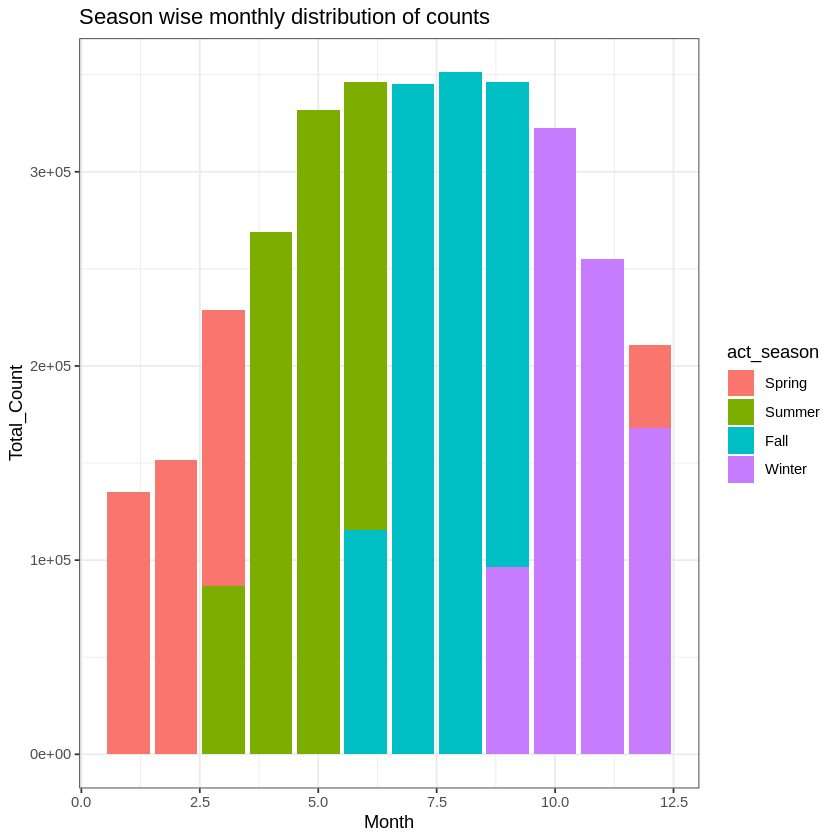

In [51]:
ggplot(bike_pr_day,aes(x=month,y=total_count,fill=act_season))+theme_bw()+geom_col()+
labs(x='Month',y='Total_Count',title='Season wise monthly distribution of counts')

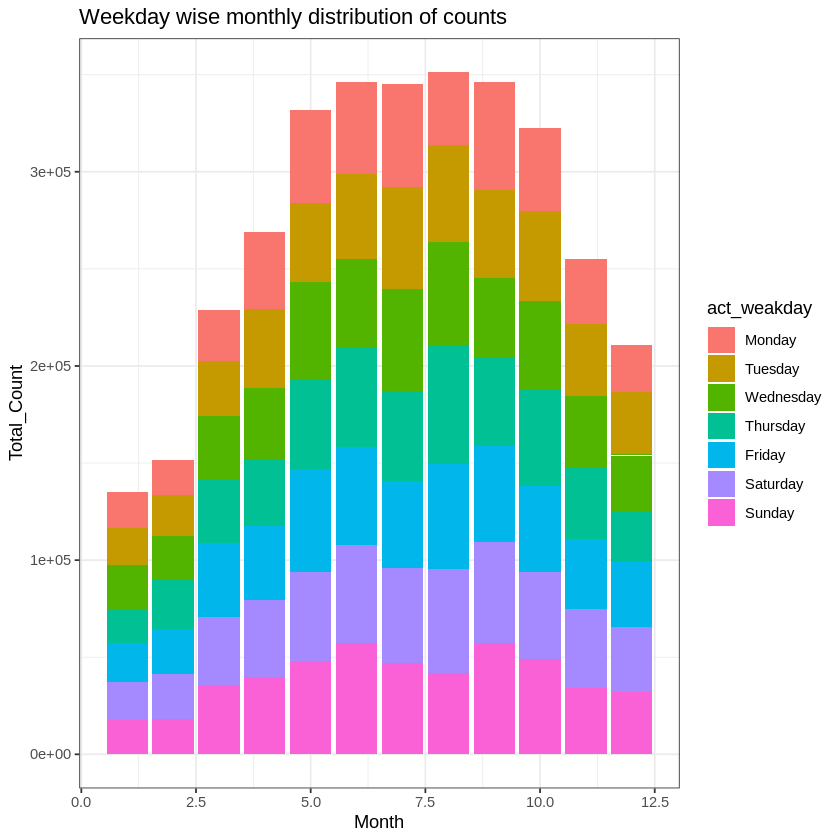

In [52]:
#column plot for weekday wise monthly distribution of counts
ggplot(bike_pr_day,aes(x=month,y=total_count,fill=act_weakday))+theme_bw()+geom_col()+
labs(x='Month',y='Total_Count',title='Weekday wise monthly distribution of counts')


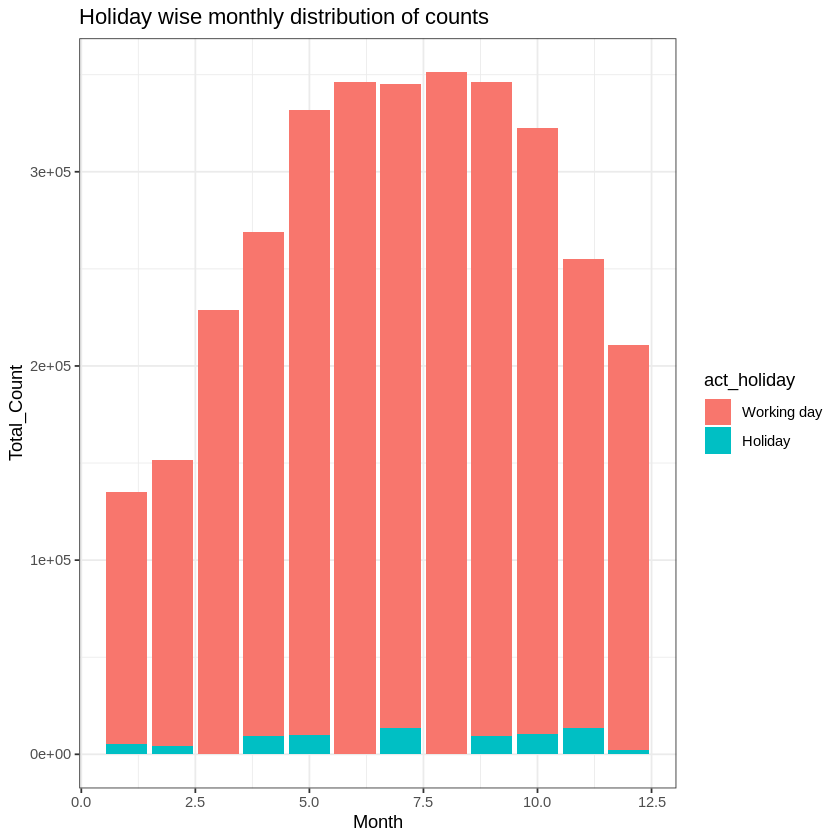

In [53]:
ggplot(bike_pr_day,aes(x=month,y=total_count,fill=act_holiday))+theme_bw()+geom_col()+
labs(x='Month',y='Total_Count',title='Holiday wise monthly distribution of counts')

- From the above plots, we can see that the bike rental count is increased in spring and summer season and then decreased in fall and winter season.
- bike rental count is high on working day than holiday

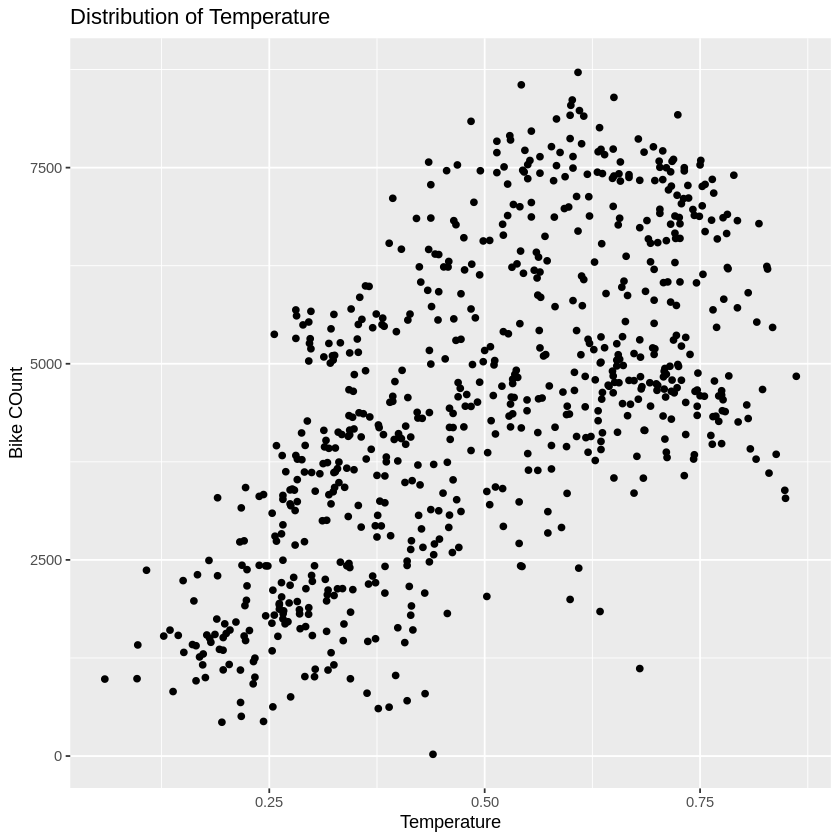

In [54]:
ggplot(data = bike_pr_day, aes(x =temp, y = total_count)) + ggtitle("Distribution of Temperature") + geom_point() + xlab("Temperature") + ylab("Bike COunt")

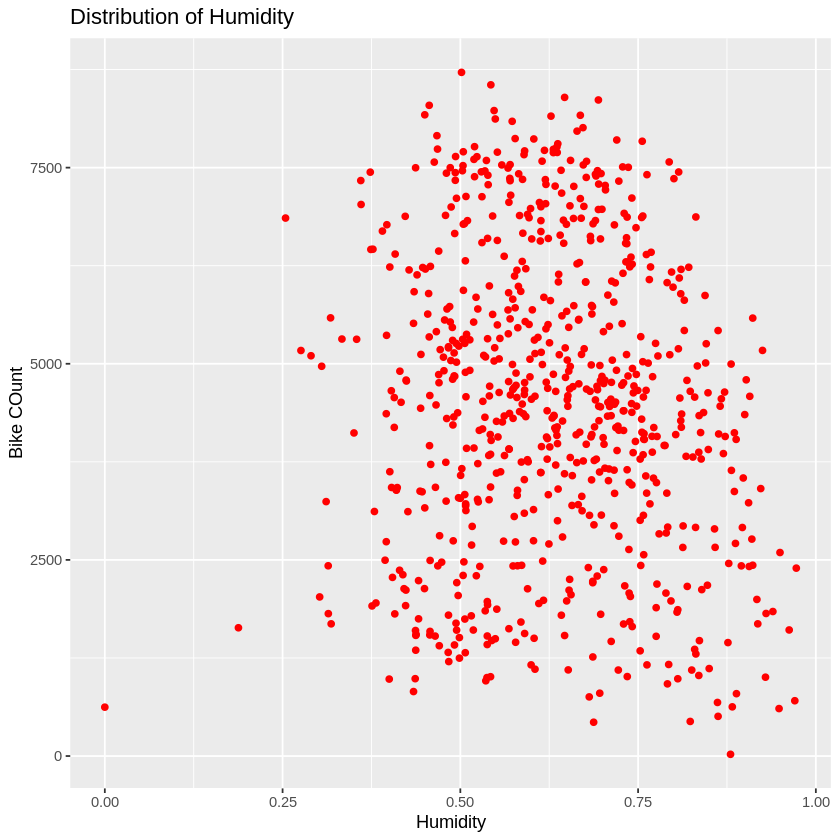

In [55]:
ggplot(data = bike_pr_day, aes(x =humidity, y = total_count)) + ggtitle("Distribution of Humidity") + geom_point(color="red") + xlab("Humidity") + ylab("Bike COunt")

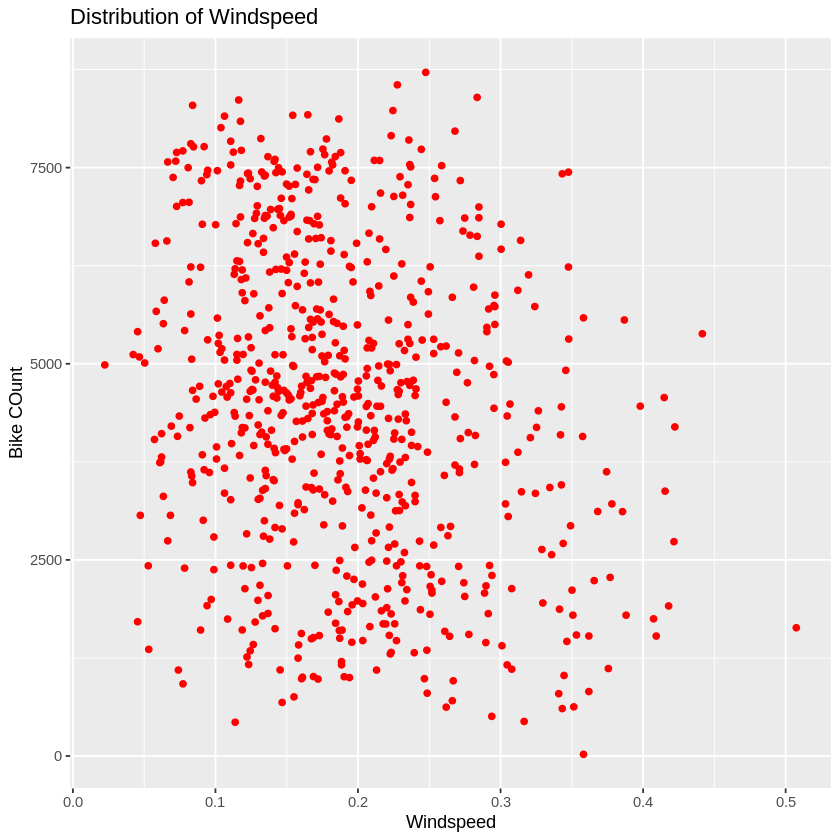

In [56]:
ggplot(data = bike_pr_day, aes(x =windspeed, y = total_count)) + ggtitle("Distribution of Windspeed") + geom_point(color="red") + xlab("Windspeed") + ylab("Bike COunt")

- From Temprature vs bike count plot we can see that there is slight positive correlation 
- From humidity vs bike count plot we can see there is slight negative correlation
- From windspeed vs bike count plot we can see there is no correlation

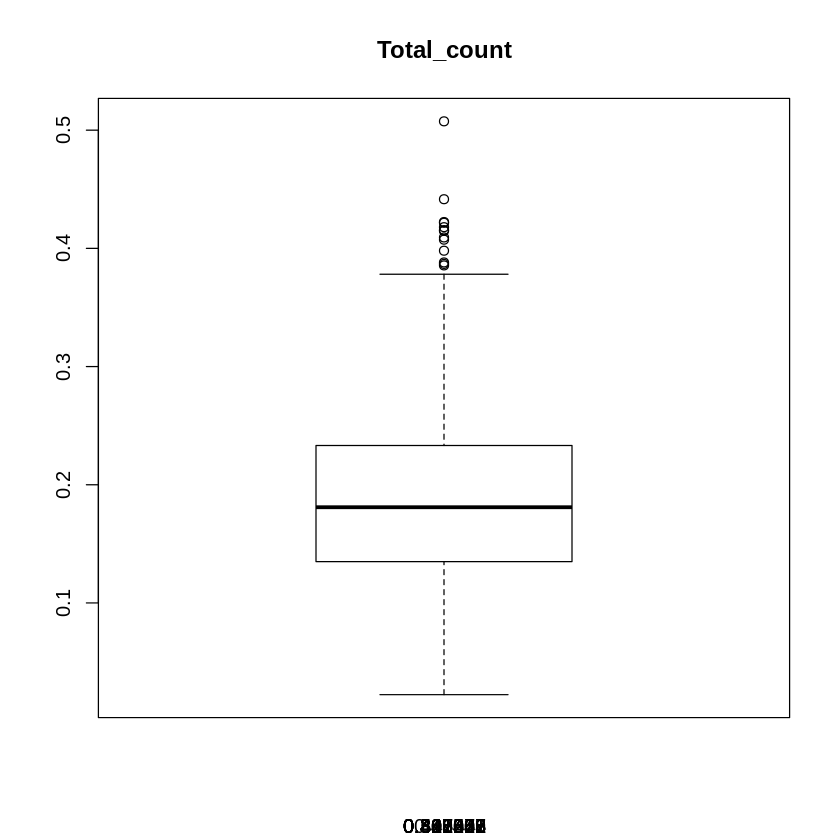

In [57]:
#boxplot for total_count_outliers
par(mfrow=c(1, 1))#divide graph area in 1 columns and 1 rows
boxplot(bike_pr_day$windspeed,main='Total_count',sub=paste(boxplot.stats(bike_pr_day$windspeed)$out))

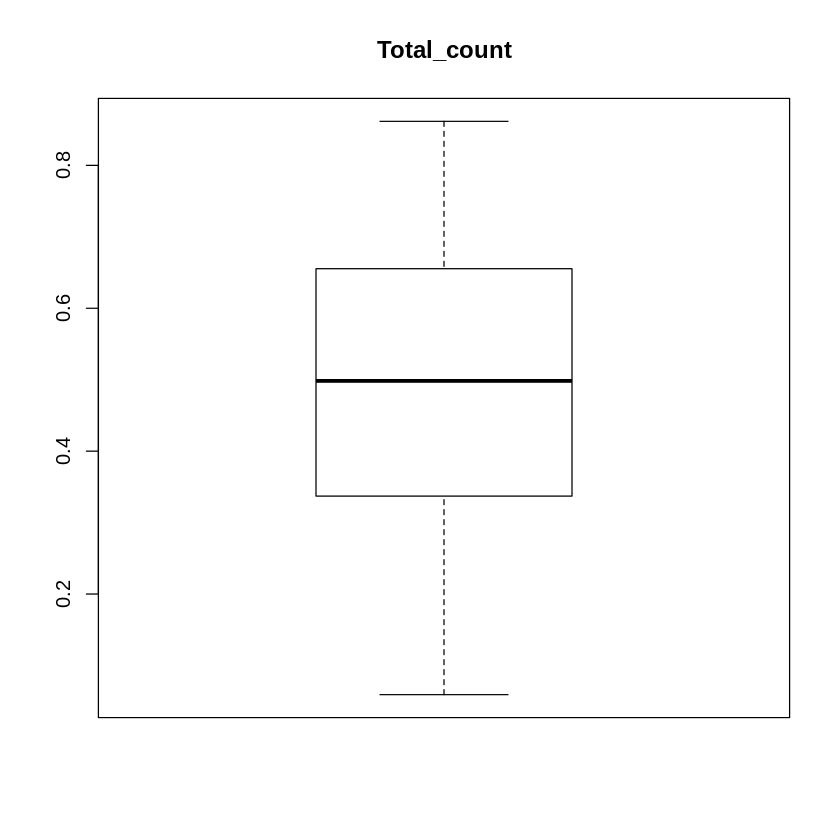

In [58]:
boxplot(bike_pr_day$temp,main='Total_count',sub=paste(boxplot.stats(bike_pr_day$temp)$out))

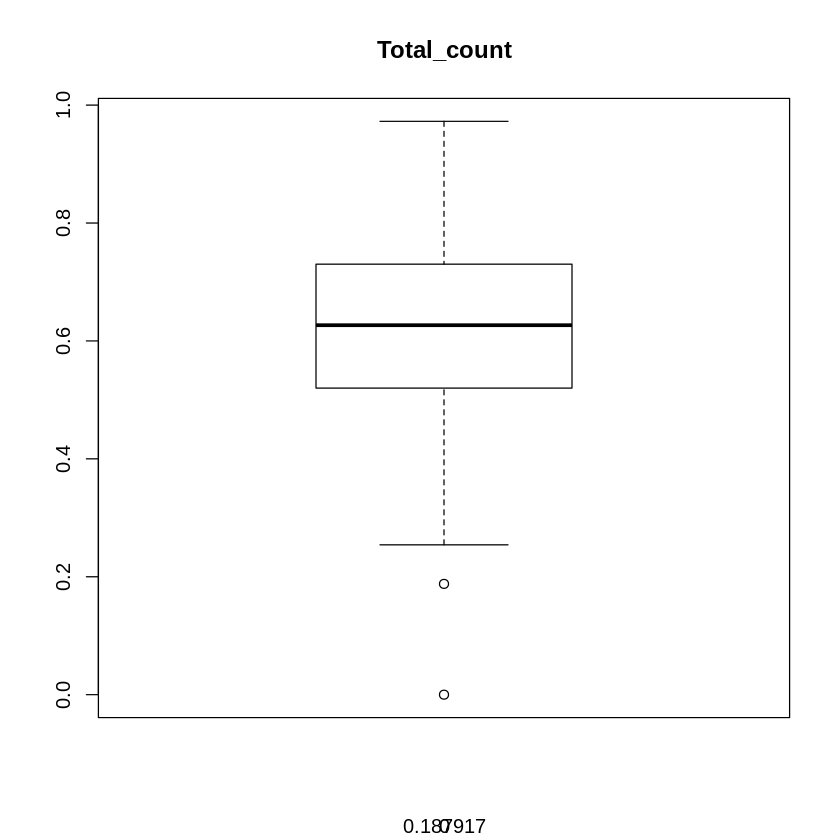

In [59]:
boxplot(bike_pr_day$humidity,main='Total_count',sub=paste(boxplot.stats(bike_pr_day$humidity)$out))

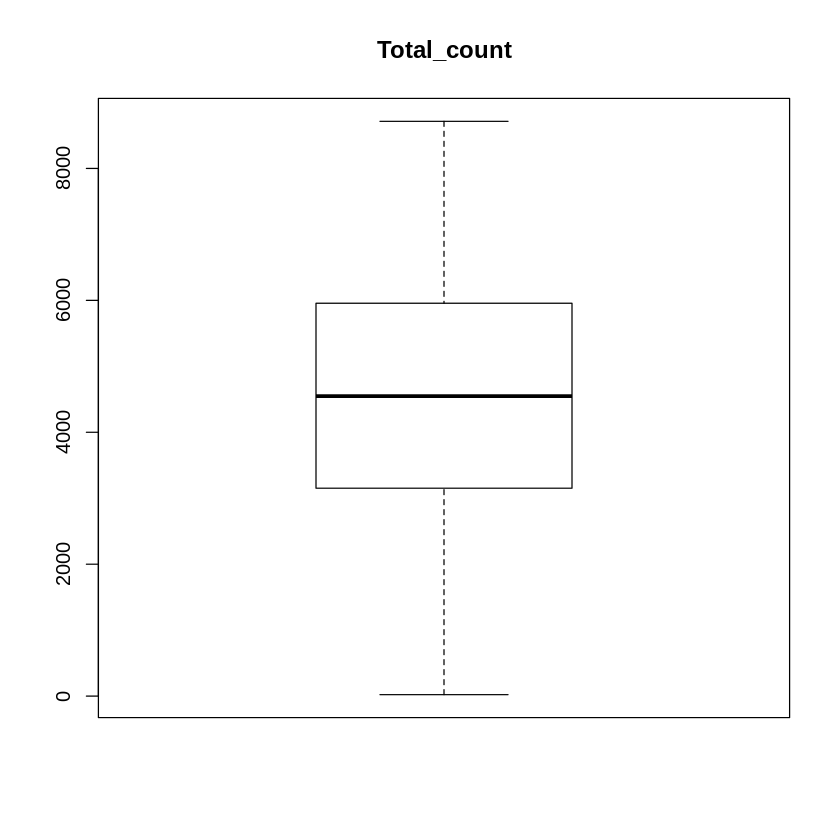

In [60]:
boxplot(bike_pr_day$total_count,main='Total_count',sub=paste(boxplot.stats(bike_pr_day$total_count)$out))

- From the box plot, we can observed that no outliers are present in temp,total_count and registered variables but  few outliers are present in windspeed,and humidity variable.
- lets replace outlier with na and impute na with mean value

In [61]:
############################################Outlier Analysis##################################################

#create subset for windspeed and humidity variable
wind_hum<-subset(bike_pr_day,select=c('windspeed','humidity'))

cnames<-colnames(wind_hum)
for(i in cnames){
    val=wind_hum[,i][wind_hum[,i] %in% boxplot.stats(wind_hum[,i])$out] #outlier values
    wind_hum[,i][wind_hum[,i] %in% val]= NA  # Replace outliers with NA 
}
#Imputating the outlier values using mean imputation method
wind_hum$windspeed[is.na(wind_hum$windspeed)]<-mean(wind_hum$windspeed,na.rm=T) 
wind_hum$humidity[is.na(wind_hum$humidity)]<-mean(wind_hum$humidity,na.rm=T)
new_df<-subset(bike_pr_day,select=-c(windspeed,humidity))

bike_rent_df<-cbind(new_df,wind_hum)
head(bike_rent_df)

id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,casual,registered,total_count,act_season,act_holiday,act_weathersit,act_weakday,windspeed,humidity
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,331,654,985,Spring,Working day,Cloudy/Mist,Sunday,0.1604460,0.805833
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,131,670,801,Spring,Working day,Cloudy/Mist,Monday,0.2485390,0.696087
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,120,1229,1349,Spring,Working day,Clear,Tuesday,0.2483090,0.437273
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,108,1454,1562,Spring,Working day,Clear,Wednesday,0.1602960,0.590435
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,82,1518,1600,Spring,Working day,Clear,Thursday,0.1869000,0.436957
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,88,1518,1606,Spring,Working day,Clear,Friday,0.0895652,0.518261


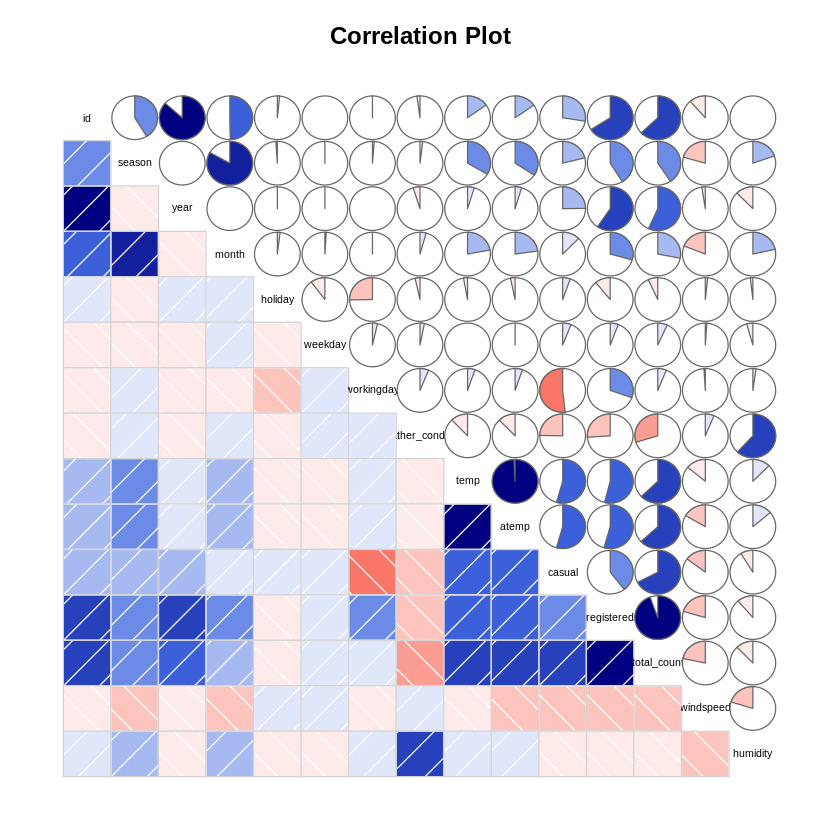

In [62]:
##################################Feature Selection#############################################################
numeric_index= sapply(bike_rent_df,is.numeric) #selecting only numeric
## Correlation Plot 
corrgram(bike_rent_df[,numeric_index], order = F,
         upper.panel=panel.pie, text.panel=panel.txt, main = "Correlation Plot")

- temp and atemp are strongly correlated
- If both features are included in the model, this will cause the issue of Multicollinearity.
  Hence we will take only one temperature feature into the model.
- The features casual and registered are removed because that is what we are going to predict.

In [63]:

#Create a new subset for training model
final_bkr_data<-subset(bike_rent_df,select=c('season','year','month','holiday', 'weekday','workingday','weather_condition','temp','humidity','windspeed','total_count'))






In [64]:
###################################Model Development#######################################


#Divide data into train and test
set.seed(1234)
train.index = createDataPartition(final_bkr_data$total_count, p = .80, list = FALSE)
train = final_bkr_data[ train.index,]
test  = final_bkr_data[-train.index,]
str(train)

'data.frame':	587 obs. of  11 variables:
 $ season           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ year             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday          : int  0 1 2 4 5 6 0 1 2 5 ...
 $ workingday       : int  0 1 1 1 1 0 0 1 1 1 ...
 $ weather_condition: int  2 1 1 1 2 2 1 1 2 1 ...
 $ temp             : num  0.363 0.196 0.2 0.204 0.197 ...
 $ humidity         : num  0.696 0.437 0.59 0.518 0.499 ...
 $ windspeed        : num  0.2485 0.2483 0.1603 0.0896 0.1687 ...
 $ total_count      : int  801 1349 1562 1606 1510 959 822 1321 1263 1421 ...


- Divided the data into 80% training and 20% testing data
- training data consist of 587 observations with 11 variables.

## Decision tree for regression
- Here our target variable having continuous values hence we have to use regression model in which by variance
we decide best splits 
- lower values of variance clearly leading to more pure node and high value of variance lead to impure node 
- variance reduction : <br />
In the anova method <br />
the splitting criteria is <br /> SST − (SSL + SSR), where SST = P(yi − y¯)2
is the sum of
squares for the node, and SSR, SSL are the sums of squares for the right and left son,
respectively. <br /> This is equivalent to choosing the split to maximize the between-groups
sum-of-squares in a simple analysis of variance. This rule is identical to the regression
option for tree
- rpart for regression
```
rpart(formula, data=, method=,control=) where
               formula : is in the format 
                        outcome ~ predictor1+predictor2+predictor3+ect.
               data : training dataset
               method : 
                      "class" for a classification tree 
                      "anova" for a regression tree
               control : optional parameters for controlling tree growth.
```

In [65]:
###################################Decision tree for regression###########################################
# 
# lets develope decision rules for predicting a continuous (regression tree) outcome.

# ##rpart for regression


fit = rpart(total_count ~ ., data = train, method = "anova")


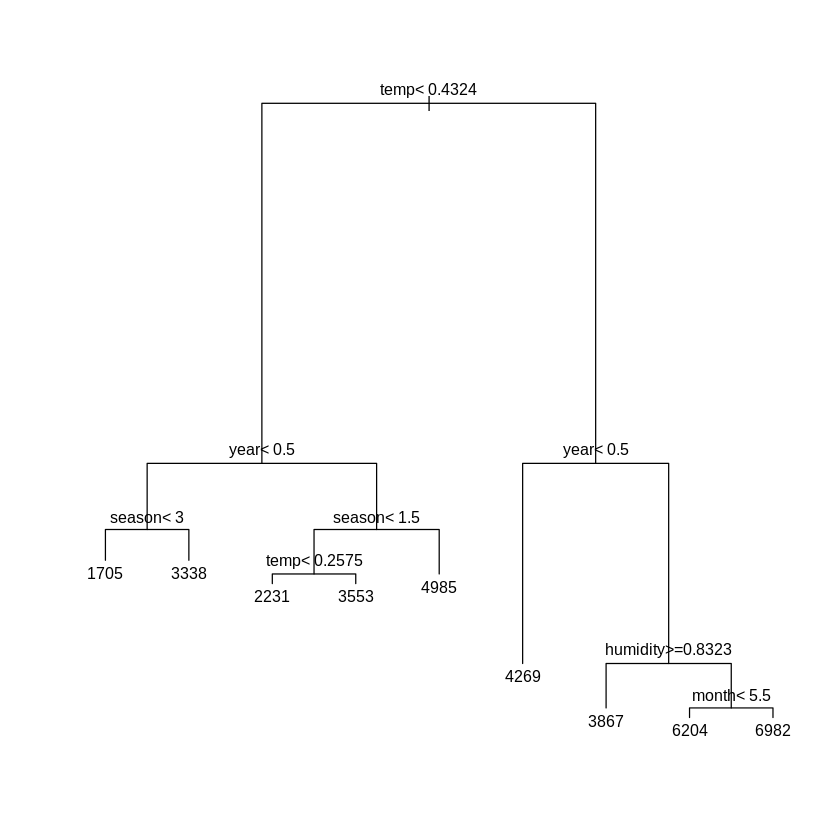

In [66]:
# decision tree model visualisation
par(cex= 0.8)
plot(fit)
text(fit)

In [67]:
#Predict for new test cases

predictions_DT = predict(fit, test[,-11])


In [68]:
####################Mean Absolute Percentage Error###########################################

error <- mape(predictions_DT,test$total_count)
error
accuracy <- (1-error)*100
accuracy


####################Root Mean square Error###########################################
rmse(actual = test$total_count,predicted = predictions_DT)



[1] 0.1695047

[1] 83.04953

[1] 910.0989

### Mean absolute percentage error
- The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. 
- can be calculated as the average absolute percent error for each time period minus actual values divided by actual values.
### Root Mean square Error
- Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
- It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.
- Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
### For Decision tree model 
* mean absolute percentage error = 0.169504694884855 
* accuracy = 83.0495305115145 %
* Root mean square error = 910.098855669325



In [69]:
# Accuracy of decision tree is 83.0495305115145 %
####################################################################################################
# save the model to disk
saveRDS(fit, "./DT_model.rds")

In [70]:
# load the model
model <- readRDS("./DT_model.rds")

# make a predictions on new data using saved model
final_predictions <- predict(model, test[,-11])




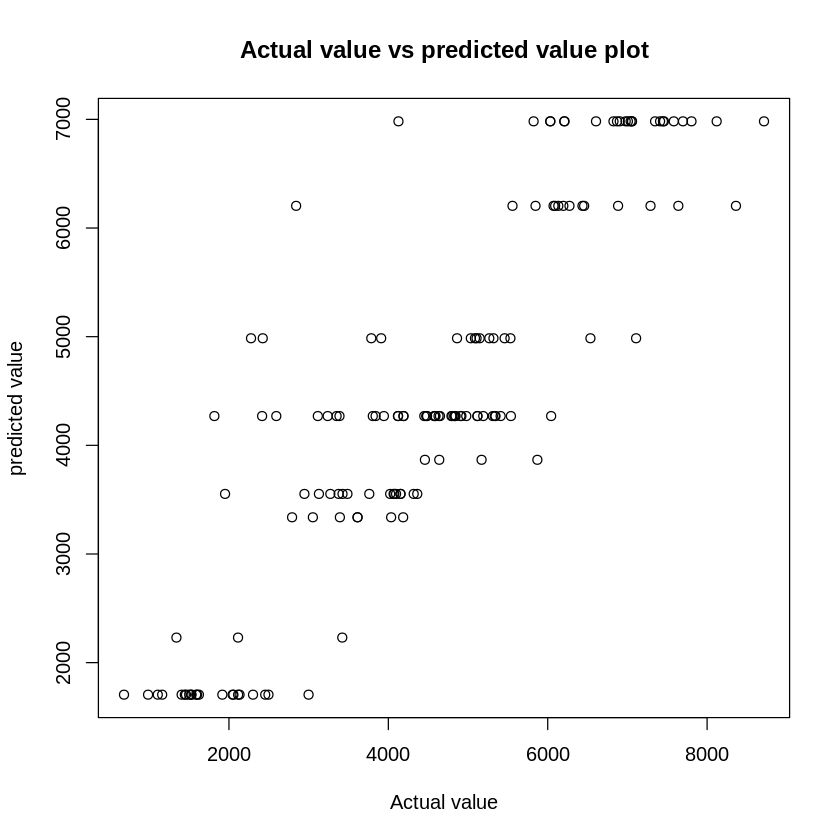

In [71]:
# Actual value vs predicted value plot tells about variance between actual target value and predicted target value
plot(test$total_count,final_predictions,xlab='Actual value',ylab='predicted value',main='Actual value vs predicted value plot')
abline(0,0)

## Random Forest for regression
A random forest allows us to determine the most important predictors across the explanatory variables by generating many decision trees and then ranking the variables by importance.


In [72]:
############################################Random Forest########################################################

library(randomForest)

rf <- randomForest(total_count ~ ., data = train, ntree=20)

predictions_RF = predict(rf, test[,-11])

# save the model to disk
saveRDS(rf, "./RF_model.rds")

In [73]:
####################Mean Absolute Percentage Error###########################################

error <- mape(predictions_RF,test$total_count)
error
accuracy <- (1-error)*100
accuracy


####################Root Mean square Error###########################################
rmse(actual = test$total_count,predicted = predictions_RF)



[1] 0.1215932

[1] 87.84068

[1] 668.6555

In [74]:
# Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) 
# where p is number of variables in x) and regression (p/3)
##############################Random Forest model###################################

rf_2=randomForest(total_count ~ . , data = train,mtry =4,ntree=100 ,nodesize =10 ,importance =TRUE)

In [75]:
predictions_RF2 = predict(rf_2, test[,-11])

In [76]:
####################Mean Absolute Percentage Error###########################################

error <- mape(predictions_RF2,test$total_count)
error
accuracy <- (1-error)*100
accuracy


####################Root Mean square Error###########################################
rmse(actual = test$total_count,predicted = predictions_RF2)



[1] 0.1161194

[1] 88.38806

[1] 661.4879

### Random Forest model 
* mean absolute percentage error = 0.116119353398914 
* accuracy = 88.3880646601086 %
* Root mean square error = 661.487858223226

If we compare random forest with Decision tree , model accuracy is higher and root mean sqr error is lower 


## Regression Analysis
Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. 
Mathematically, regression uses a linear function to approximate (predict) the dependent variable given as:
 Y = βo + β1X + ∈
where, Y - Dependent variable
X - Independent variable
βo - Intercept
β1 - Slope
∈ - Error
- βo and β1 are known as coefficients. This is the equation of simple linear regression. 
- Error is an inevitable part of the prediction-making process. No matter how powerful the algorithm we choose, there will always remain an (∈) irreducible error
The formula to calculate coefficients goes like this:
β1 = Σ(xi - xmean)(yi-ymean)/ Σ (xi - xmean)² where i= 1 to n (no. of obs.)

βo = ymean - β1(xmean)

In [77]:
#################################################Regression Analysis#############################################
#the base function lm is used for regression.
regmodel <- lm(total_count ~ ., data = train)
summary(regmodel)


Call:
lm(formula = total_count ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4148.0  -454.5    41.6   542.4  3104.0 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1593.50     253.71   6.281 6.65e-10 ***
season              547.82      59.75   9.169  < 2e-16 ***
year               2066.45      72.30  28.581  < 2e-16 ***
month               -36.49      18.79  -1.942  0.05258 .  
holiday            -655.13     233.84  -2.802  0.00526 ** 
weekday              70.51      17.84   3.952 8.73e-05 ***
workingday          132.48      78.94   1.678  0.09383 .  
weather_condition  -637.24      88.03  -7.239 1.46e-12 ***
temp               5068.96     212.95  23.803  < 2e-16 ***
humidity          -1143.12     353.56  -3.233  0.00129 ** 
windspeed         -2322.85     536.55  -4.329 1.76e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 864.8 on 576 degrees of freedom
Multipl

- Intercept - This is the βo value. It's the prediction made by model when all the independent variables are
            set to zero.
- Estimate - This represents regression coefficients for respective variables. 
- Std. Error - This determines the level of variability associated with the estimates.
- t value - t statistic is generally used to determine variable significance, i.e. 
          if a variable is significantly adding information to the model. 
- t value > 2 suggests the variable is significant. 
- p value - It's the probability value of respective variables determining their significance in the model.
          p value < 0.05 is always desirable.

 The adjusted R² implies that our model explains ~80.4% total variance in the data.

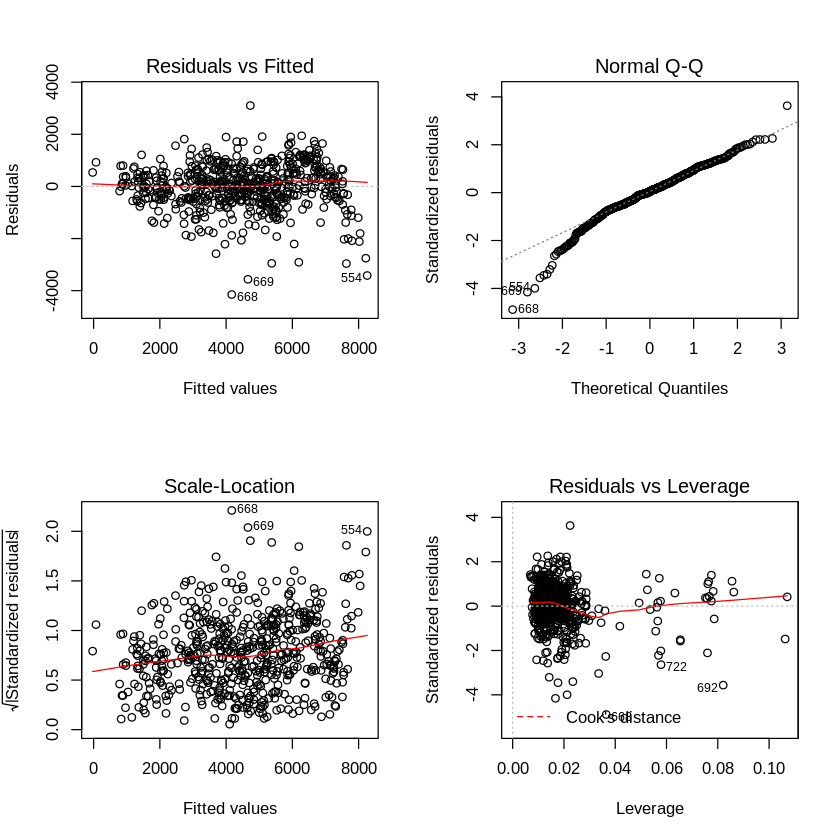

In [78]:

#check the residual plots, understand the pattern and derive actionable insights (if any):

par(mfrow=c(2,2))
#create residual plots
plot (regmodel)

- A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis
- From the Quantile plots plot we can say that the residual is normally distributed.
- from the scattered plot of residual vs fitted values plot we can say that perfect residual distribution

In [79]:
# lets test model
regpred <- predict(regmodel, test[-11])

In [80]:
error <- mape(regpred,test$total_count)
error
accuracy <- (1-error)*100
accuracy
rmse(actual = test$total_count,predicted = regpred)


[1] 0.186551

[1] 81.3449

[1] 950.2266


By comparing  with random forest regression we can see that 
### Multiple Linear Regression model 
* mean absolute percentage error = 0.186550951376743
* accuracy = 81.3449048623257 %
* Root mean square error = 950.226605469929

### Random Forest model 
* mean absolute percentage error = 0.116119353398914 
* accuracy = 88.3880646601086 %
* Root mean square error = 661.487858223226
### For Decision tree model 
* mean absolute percentage error = 0.169504694884855 
* accuracy = 83.0495305115145 %
* Root mean square error = 910.098855669325

### By compairing Decision tree, Random Forest and Multiple Linear Regression models we can say that Random Forest model performing very well on this dataset